In [1]:
import matplotlib.pyplot as plt
from torchvision.io import read_image
import os
import torch

from torchvision.io import read_image
from torchvision.ops.boxes import masks_to_boxes
from torchvision import tv_tensors
from torchvision.transforms.v2 import functional as F
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor
from torchvision.transforms import v2 as T
import utils
from engine import train_one_epoch, evaluate
import matplotlib.pyplot as plt

from torchvision.utils import draw_bounding_boxes, draw_segmentation_masks
import matplotlib.pyplot as plt
import cv2
from torchvision.utils import draw_bounding_boxes, draw_segmentation_masks

/home/djoser/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
def get_transform(train):
    transforms = []
    if train:
        transforms.append(T.RandomHorizontalFlip(0.5))
    transforms.append(T.ToDtype(torch.float, scale=True))
    transforms.append(T.ToPureTensor())
    return T.Compose(transforms)

/tmp/ipykernel_26865/4223104093.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_1=torch.load("save_models/ball_detector_1.pt")
/tmp/ipykernel_26865/4223104093.py:5

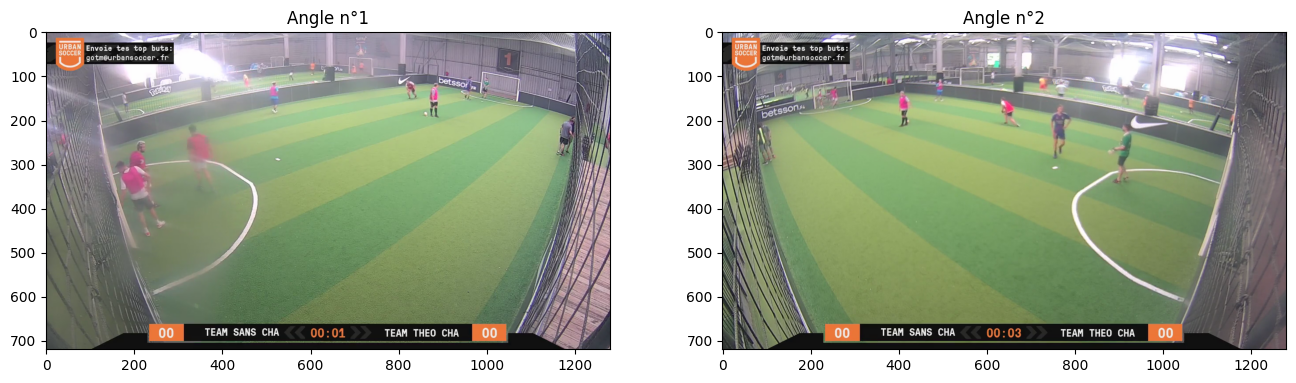

In [8]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

n=50
model_1=torch.load("save_models/ball_detector_1.pt")
model_2=torch.load("save_models/ball_detector_2.pt")
image1 = read_image(f"data/match1/angle1/frame_{n:08d}.png")
image2 = read_image(f"data/match1/angle2/frame_{n+55:08d}.png")
eval_transform = get_transform(train=False)

#model.eval()
model_1.eval()
model_2.eval()
with torch.no_grad():
    x1 = eval_transform(image1)
    # convert RGBA -> RGB and move to device
    x1 = x1[:3, ...].to(device)
    predictions1 = model_1([x1, ])
    pred1 = predictions1[0]


    x2 = eval_transform(image2)
    # convert RGBA -> RGB and move to device
    x2 = x2[:3, ...].to(device)
    predictions2 = model_2([x2, ])
    pred2 = predictions2[0]


image1 = (255.0 * (image1 - image1.min()) / (image1.max() - image1.min())).to(torch.uint8)
image2 = (255.0 * (image2 - image2.min()) / (image2.max() - image2.min())).to(torch.uint8)
image1 = image1[:3, ...]
image2 = image2[:3, ...]
pred_labels1 = [f"pedestrian: {score:.3f}" for label, score in zip(pred1["labels"], pred1["scores"])]
pred_labels2 = [f"pedestrian: {score:.3f}" for label, score in zip(pred2["labels"], pred2["scores"])]
pred_boxes1 = pred1["boxes"].long()
pred_boxes2 = pred2["boxes"].long()
output_image1 = draw_bounding_boxes(image1, pred_boxes1, pred_labels1, colors="red")
output_image2 = draw_bounding_boxes(image2, pred_boxes2, pred_labels2, colors="red")

masks1 = (pred1["masks"] > 0.7).squeeze(1)
masks2 = (pred2["masks"] > 0.7).squeeze(1)
output_image1 = draw_segmentation_masks(output_image1, masks1, alpha=0.5, colors="blue")
output_image2 = draw_segmentation_masks(output_image2, masks2, alpha=0.5, colors="blue")



plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.title("Angle n°1")
plt.imshow(output_image1.permute(1, 2, 0))
plt.subplot(122)
plt.title("Angle n°2")
plt.imshow(output_image2.permute(1, 2, 0))

/tmp/ipykernel_6175/2694231558.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model=torch.load("save_models/player_detector.pt")


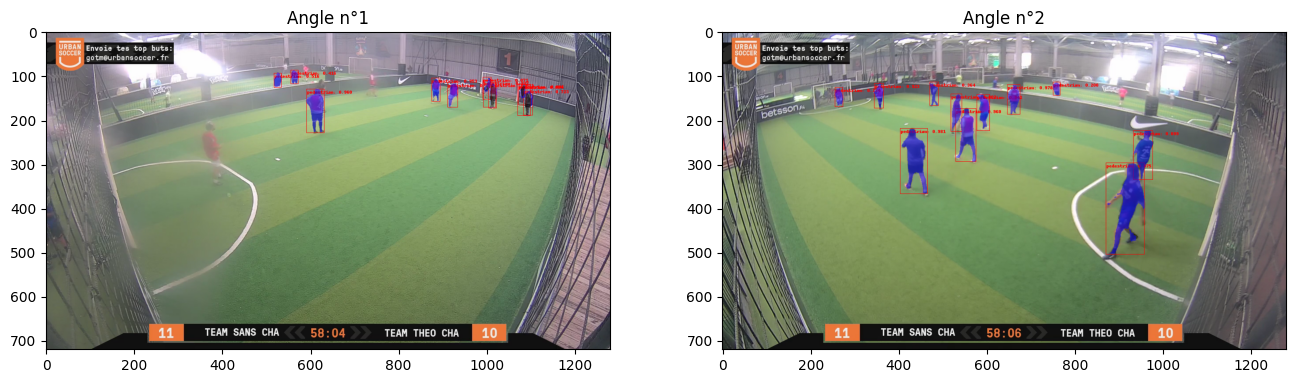

In [8]:
n=104525

image1 = read_image(f"data/match1/angle1/frame_{n:08d}.png")
image2 = read_image(f"data/match1/angle2/frame_{n+55:08d}.png")
eval_transform = get_transform(train=False)
model=torch.load("save_models/player_detector.pt")
model.eval()
with torch.no_grad():
    x1 = eval_transform(image1)
    # convert RGBA -> RGB and move to device
    x1 = x1[:3, ...].to(device)
    predictions1 = model([x1, ])
    pred1 = predictions1[0]


    x2 = eval_transform(image2)
    # convert RGBA -> RGB and move to device
    x2 = x2[:3, ...].to(device)
    predictions2 = model([x2, ])
    pred2 = predictions2[0]


image1 = (255.0 * (image1 - image1.min()) / (image1.max() - image1.min())).to(torch.uint8)
image2 = (255.0 * (image2 - image2.min()) / (image2.max() - image2.min())).to(torch.uint8)
image1 = image1[:3, ...]
image2 = image2[:3, ...]
pred_labels1 = [f"pedestrian: {score:.3f}" for label, score in zip(pred1["labels"], pred1["scores"])]
pred_labels2 = [f"pedestrian: {score:.3f}" for label, score in zip(pred2["labels"], pred2["scores"])]
pred_boxes1 = pred1["boxes"].long()
pred_boxes2 = pred2["boxes"].long()
output_image1 = draw_bounding_boxes(image1, pred_boxes1, pred_labels1, colors="red")
output_image2 = draw_bounding_boxes(image2, pred_boxes2, pred_labels2, colors="red")

masks1 = (pred1["masks"] > 0.7).squeeze(1)
masks2 = (pred2["masks"] > 0.7).squeeze(1)
output_image1 = draw_segmentation_masks(output_image1, masks1, alpha=0.5, colors="blue")
output_image2 = draw_segmentation_masks(output_image2, masks2, alpha=0.5, colors="blue")



plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.title("Angle n°1")
plt.imshow(output_image1.permute(1, 2, 0))
plt.subplot(122)
plt.title("Angle n°2")
plt.imshow(output_image2.permute(1, 2, 0))

In [23]:
def process_frame(image, model_person, model_ball, eval_transform, device):
    with torch.no_grad():
        x = eval_transform(image)
        # convert RGBA -> RGB and move to device
        x = x[:3, ...].to(device)

        # Predictions for person detector
        predictions_person = model_person([x, ])
        pred_person = predictions_person[0]

        # Predictions for ball detector
        predictions_ball = model_ball([x, ])
        pred_ball = predictions_ball[0]

    image = (255.0 * (image - image.min()) / (image.max() - image.min())).to(torch.uint8)
    image = image[:3, ...]

    # Draw bounding boxes and masks for persons
    pred_labels_person = [f"person: {score:.3f}" for label, score in zip(pred_person["labels"], pred_person["scores"])]
    pred_boxes_person = pred_person["boxes"].long()
    output_image = draw_bounding_boxes(image, pred_boxes_person, pred_labels_person, colors="red")
    masks_person = (pred_person["masks"] > 0.7).squeeze(1)
    output_image = draw_segmentation_masks(output_image, masks_person, alpha=0.5, colors="blue")

    # Draw bounding boxes and masks for balls
    pred_labels_ball = [f"ball: {score:.3f}" for label, score in zip(pred_ball["labels"], pred_ball["scores"])]
    pred_boxes_ball = pred_ball["boxes"].long()
    output_image = draw_bounding_boxes(output_image, pred_boxes_ball, pred_labels_ball, colors="green")
    masks_ball = (pred_ball["masks"] > 0.7).squeeze(1)
    output_image = draw_segmentation_masks(output_image, masks_ball, alpha=0.5, colors="yellow")

    return output_image.permute(1, 2, 0).numpy()

In [33]:
def generate_videos(start_frame, end_frame, model_person, model_ball_1, model_ball_2, eval_transform, device, output_video1, output_video2):
    # Lire une image pour obtenir les dimensions
    
    image_height=720
    image_width=1280

    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out1 = cv2.VideoWriter(output_video1, fourcc, 20.0, (image_width, image_height))
    out2 = cv2.VideoWriter(output_video2, fourcc, 20.0, (image_width, image_height))

    for n in range(start_frame, end_frame):
        image1 = read_image(f"data/match1/angle1/frame_{n:08d}.png")
        image2 = read_image(f"data/match1/angle2/frame_{n+55:08d}.png")

        output_image1 = process_frame(image1, model_person, model_ball_1, eval_transform, device)
        output_image2 = process_frame(image2, model_person, model_ball_2, eval_transform, device)
        #print(f"Image shape: {image1.shape}")

        #plt.imshow(output_image1)
        #plt.show()
        out1.write(cv2.cvtColor(output_image1, cv2.COLOR_RGB2BGR))
        out2.write(cv2.cvtColor(output_image2, cv2.COLOR_RGB2BGR))

    out1.release()
    out2.release()

In [34]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model_person = torch.load("save_models/player_detector.pt")
model_ball_1 = torch.load("save_models/ball_detector_1.pt")
model_ball_2 = torch.load("save_models/ball_detector_2.pt")

model_person.eval()
model_ball_1.eval()
model_ball_2.eval()

eval_transform = get_transform(train=False)

start_frame = 7445
end_frame = 8000  # Par exemple, pour générer 55 frames
output_video1 = "output_video1.avi"
output_video2 = "output_video2.avi"

generate_videos(start_frame, end_frame, model_person, model_ball_1, model_ball_2, eval_transform, device, output_video1, output_video2)

/tmp/ipykernel_8798/792373002.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_person = torch.load("save_models/player_detector.pt")
/tmp/ipykernel_8798/792373002.p